In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
#regex
import re

In [32]:
df=pd.read_csv('BA_Clean.csv') 

In [33]:
df

,Unnamed: 0,Unnamed: 0.1,reviews,stars,date,country
0,0,0,4/4 flights we booked this holiday were dela...,5,6th September 2023,(Germany)
1,1,1,British Airways has a total lack of respect ...,1,4th September 2023,(United Kingdom)
2,2,2,"London Heathrow to Keflavik, Iceland in Busin...",1,4th September 2023,(Iceland)
3,3,3,Mumbai to London Heathrow in Business Class o...,8,4th September 2023,(Iceland)
4,4,4,Care and support shocking. Written by a prev...,8,4th September 2023,(United Kingdom)
...,...,...,...,...,...,...
3892,3895,3895,Travelled with my husband sister and brother i...,4,6th July 2014,(Australia)
3893,3896,3896,Flew YYZ to LHR on 1st July. Booked WT+ but wa...,8,6th July 2014,(United Kingdom)
3894,3897,3897,LHR-IAD BA 293 B772ER Club World. Checked-in f...,8,6th July 2014,(United States)
3895,3898,3898,We paid top money for Club Europe and upon lea...,2,6th July 2014,(New Zealand)


In [34]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,stars
count,3897.000000,3897.000000,3897.000000
mean,1948.163716,1948.163716,4.554529
std,1125.371090,1125.371090,3.165955
min,0.000000,0.000000,1.000000
25%,974.000000,974.000000,1.000000
50%,1948.000000,1948.000000,4.000000
75%,2922.000000,2922.000000,8.000000
max,3899.000000,3899.000000,10.000000


In [35]:
df.stars.describe()

count    3897.000000
mean        4.554529
std         3.165955
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: stars, dtype: float64

In [36]:
#Dropping the two index list  columns 
columns=['Unnamed: 0', 'Unnamed: 0.1']

df= df.drop(columns=columns)


In [37]:
df

,reviews,stars,date,country
0,4/4 flights we booked this holiday were dela...,5,6th September 2023,(Germany)
1,British Airways has a total lack of respect ...,1,4th September 2023,(United Kingdom)
2,"London Heathrow to Keflavik, Iceland in Busin...",1,4th September 2023,(Iceland)
3,Mumbai to London Heathrow in Business Class o...,8,4th September 2023,(Iceland)
4,Care and support shocking. Written by a prev...,8,4th September 2023,(United Kingdom)
...,...,...,...,...
3892,Travelled with my husband sister and brother i...,4,6th July 2014,(Australia)
3893,Flew YYZ to LHR on 1st July. Booked WT+ but wa...,8,6th July 2014,(United Kingdom)
3894,LHR-IAD BA 293 B772ER Club World. Checked-in f...,8,6th July 2014,(United States)
3895,We paid top money for Club Europe and upon lea...,2,6th July 2014,(New Zealand)


In [38]:
star_chart= df.stars.value_counts()

<Figure size 1440x720 with 0 Axes>

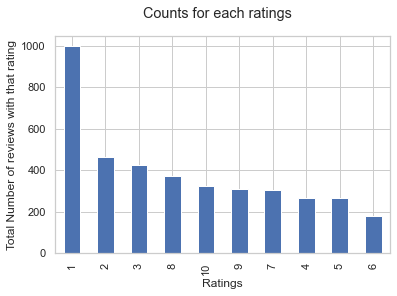

<Figure size 1440x720 with 0 Axes>

In [39]:
star_chart.plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")
plt.figure(figsize=(20, 10))  # Set the figure size (optional)
# Add data labels on top of each bar (optional)



##### Number of reviews by country

In [40]:
# Group the data by the "country" column and count the number of reviews for each country
country_review_counts = df['country'].value_counts().reset_index()

# Rename the columns for clarity
country_review_counts.columns = ['Country', 'Number of Reviews']

# Display the resulting DataFrame
print(country_review_counts)

                      Country  Number of Reviews
0           (United Kingdom)                2381
1            (United States)                 490
2                (Australia)                 157
3                   (Canada)                 127
4                  (Germany)                  68
..                        ...                ...
65      (Dominican Republic)                   1
66                 (Vietnam)                   1
67                 (Ukraine)                   1
68   (Saint Kitts and Nevis)                   1
69       (Trinidad & Tobago)                   1

[70 rows x 2 columns]


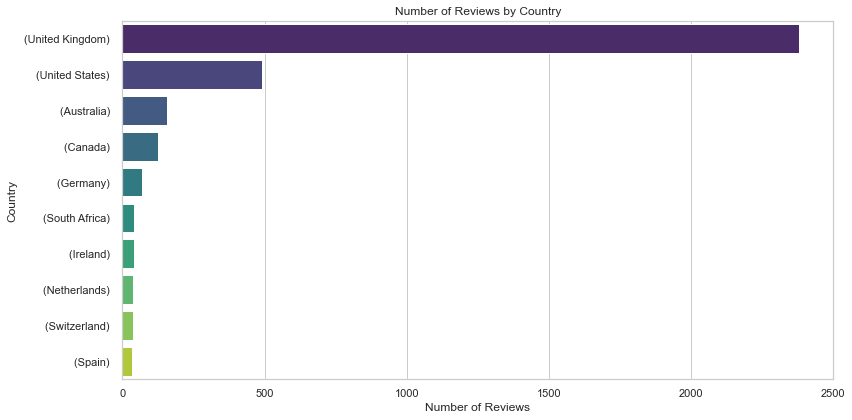

In [41]:
sns.set(style="whitegrid")

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
sns.barplot(data=country_review_counts.head(10), x='Number of Reviews', y='Country', palette='viridis')

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.title('Number of Reviews by Country')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing (optional)
plt.show()

##### Top 12 Countries with avg highest rating provided to British Airways5

In [42]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [43]:
df_country_rating

,country,stars
0,(Vietnam),10.000000
1,(Jordan),10.000000
2,(Finland),9.000000
3,(Luxembourg),8.500000
4,(Saint Kitts and Nevis),8.000000
...,...,...
65,(Senegal),2.666667
66,(Laos),2.000000
67,(Philippines),1.000000
68,(Hungary),1.000000


In [44]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

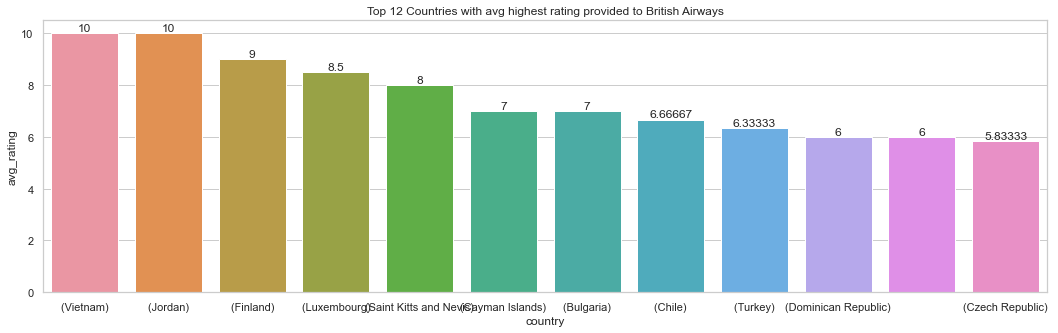

In [45]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [46]:
#create an empty list to collect cleaned data corpus
corpus =[]

reviews_data=df.reviews

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [47]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [48]:
corpus

['flight booked holiday delayed hour wifi available flight food drink basic expensive cannot recommend',
 'british airway total lack respect customer booked fly frankfurt main london city airport couple hour scheduled departure flight suddenly cancelled ba without explanation already airport worst thing utter callousness staff showed towards customer ground staff attitude merely third party agent ba employee therefore quickly washed hand u telling u contact ba directly via phone wanted help even provide u phone number telling u look ba com ba abandoned passenger tell u ba departure heathrow also cancelled meaning would ba flight frankfurt london day although airline still operating route ba refused rebook u reason given cancellation technical reason assistance information provided right due cancellation information help regarding food accommodation help etc attitude literally cancellation nothing problem received email hour later notifying automatically rebooked alternative flight hour

In [49]:
import matplotlib.font_manager

fonts = matplotlib.font_manager.findSystemFonts()
print(fonts)

['C:\\Users\\HP\\AppData\\Local\\Microsoft\\Windows\\Fonts\\AmsterdamTwoTtf-OVMEe.ttf', 'C:\\Windows\\Fonts\\tt1057m_.ttf', 'C:\\WINDOWS\\Fonts\\corbelb.ttf', 'C:\\WINDOWS\\Fonts\\GILBI___.TTF', 'C:\\WINDOWS\\Fonts\\tt0036m_.ttf', 'C:\\Windows\\Fonts\\calibriz.ttf', 'C:\\Windows\\Fonts\\OCR-a___.ttf', 'C:\\WINDOWS\\Fonts\\Candara.ttf', 'C:\\WINDOWS\\Fonts\\CENSCBK.TTF', 'C:\\Windows\\Fonts\\timesi.ttf', 'C:\\WINDOWS\\Fonts\\MSUIGHUB.TTF', 'C:\\Users\\HP\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Raleway-ExtraBoldItalic.ttf', 'C:\\WINDOWS\\Fonts\\georgiaz.ttf', 'C:\\WINDOWS\\Fonts\\BELL.TTF', 'C:\\WINDOWS\\Fonts\\LHANDW.TTF', 'C:\\WINDOWS\\Fonts\\tt0857m_.ttf', 'C:\\WINDOWS\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\tt0144m_.ttf', 'C:\\Users\\HP\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Poppins-Regular.ttf', 'C:\\Windows\\Fonts\\COPRGTB.TTF', 'C:\\WINDOWS\\Fonts\\georgiab.ttf', 'C:\\WINDOWS\\Fonts\\GOUDYSTO.TTF', 'C:\\WINDOWS\\Fonts\\LBRITEI.TTF', 'C:\\WINDOWS\\Fonts\\malgunbd.ttf', '

In [50]:
from PIL import Image, ImageDraw, ImageFont



# Specify the path to a TrueType font file
font_path = "path_to_your_font.ttf"



In [56]:


# Assuming you have loaded your data into a DataFrame named 'df' with a 'corpus' column

# Join the 'corpus' column to form a single text string
#reviews = " ".join(df['corpus'])  # Make sure to use square brackets to access the column
reviews = " ".join('corpus')
plt.figure(figsize=(20, 10))

stop_words = set(stopwords.words('english'))  # Renamed 'stopwords' to 'stop_words' to avoid variable name conflict

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

# Use a system font (e.g., Arial)
font = ImageFont.load_default()

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

<Figure size 1440x720 with 0 Axes>